2011년,2012년 자전거 대여 데이터  
대여 데이터는 1시간 간격으로 기록  
훈련 데이터는 19일까지, 테스트 데이터는 20일부터 월말까지  
피처:날짜,시간,요일,계절,날씨,실제 온도,체감 온도,습도.풍속,회뤈 여부  
시간별 자전거 대여 수량을 예측하면 된다  
예측할 값이 범주형이 아니므로 회귀 문제에 속함

**피처와 타깃값이란?**  
피처는 원하는 값을 예측하기 위해 활용하는 데이터를 의미  
타깃값은 예측해야 할 값  

In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sampleSubmission.csv")

In [3]:
train.shape

(10886, 12)

In [4]:
test.shape

(6493, 9)

|피처명|설명|
|---|---|
|datetime|기록 일시(1시간 간격)|
|season|계절(1:봄,2:여름,3:가을,4:겨울|
|holiday|공휴일 여부(0:아님,1:공휴일)|
|workingday|근무일 여부(0:근무일 아님,1:근무일)|
|weather|날씨(1:맑음,2:옅은 안개,3:약간의 눈과 비,흐림,4:폭우와 천둥 번개,눈과 짙은 안개|
|temp|실제 온도|
|atemp|체감 온도|
|humidity|상대 습도|
|windspeed|풍속|
|casual|비회원 수|
|registered|회원 수|
|count|자전거 대여 수량|

In [5]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [6]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

casual이랑 registered이 빠짐	

In [7]:
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

시간대별 대여 수량을 예측해 이 값을 바꿔서 제출하면 됨 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 피처 엔지니어링

datetime를 연도,월,일,시간,분,초로 나누기

In [10]:
train['date']=train['datetime'].apply(lambda x: x.split()[0])
train['year']=train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month']=train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day']=train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour']=train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute']=train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second']=train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [11]:
from datetime import datetime
import calendar
train['weekday']=train['date'].apply(lambda dateString:
                                    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [12]:
train['season']=train['season'].map({1:'spring',
                                   2:'summer',
                                   3:'fall',
                                   4:'winter'})

In [13]:
train['weather']=train['weather'].map({1:'clear',
                                       2:'mist,few clouds',
                                      3:'light snow,rain,thunderstorm',
                                      4: 'heavy rain, thunderstorm,snow,fog'})

In [14]:
train.head()

datetime  season  holiday  workingday weather  temp   atemp  \
0  2011-01-01 00:00:00  spring        0           0   clear  9.84  14.395   
1  2011-01-01 01:00:00  spring        0           0   clear  9.02  13.635   
2  2011-01-01 02:00:00  spring        0           0   clear  9.02  13.635   
3  2011-01-01 03:00:00  spring        0           0   clear  9.84  14.395   
4  2011-01-01 04:00:00  spring        0           0   clear  9.84  14.395   

   humidity  windspeed  casual  registered  count        date  year month day  \
0        81        0.0       3          13     16  2011-01-01  2011    01  01   
1        80        0.0       8          32     40  2011-01-01  2011    01  01   
2        80        0.0       5          27     32  2011-01-01  2011    01  01   
3        75        0.0       3          10     13  2011-01-01  2011    01  01   
4        75        0.0       0           1      1  2011-01-01  2011    01  01   

  hour minute second   weekday  
0   00     00     00  Saturday  
1   01     00     00  Saturday  
2   02     00     00  Saturday  
3   03     00     00  Saturday  
4   04     00     00  Saturday

## 시각화

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 분포도  
수치형 데이터의 집계 값(총 개수나 비율)을 나타내는 그래프

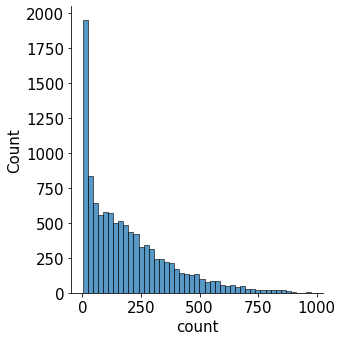

In [16]:
mpl.rc('font',size=15)
sns.displot(train['count'])

정규분포를 따르면 좋은데 데이터가 왼쪽으로 치우침 $\rightarrow$ 로그변환

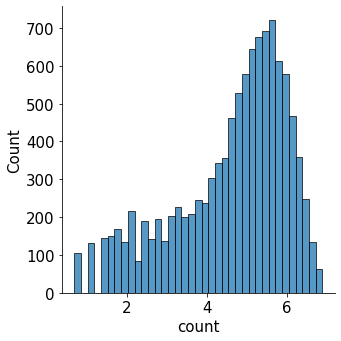

In [17]:
sns.displot(np.log1p(train['count']))

변환 전보다 정규분포에 가까워짐

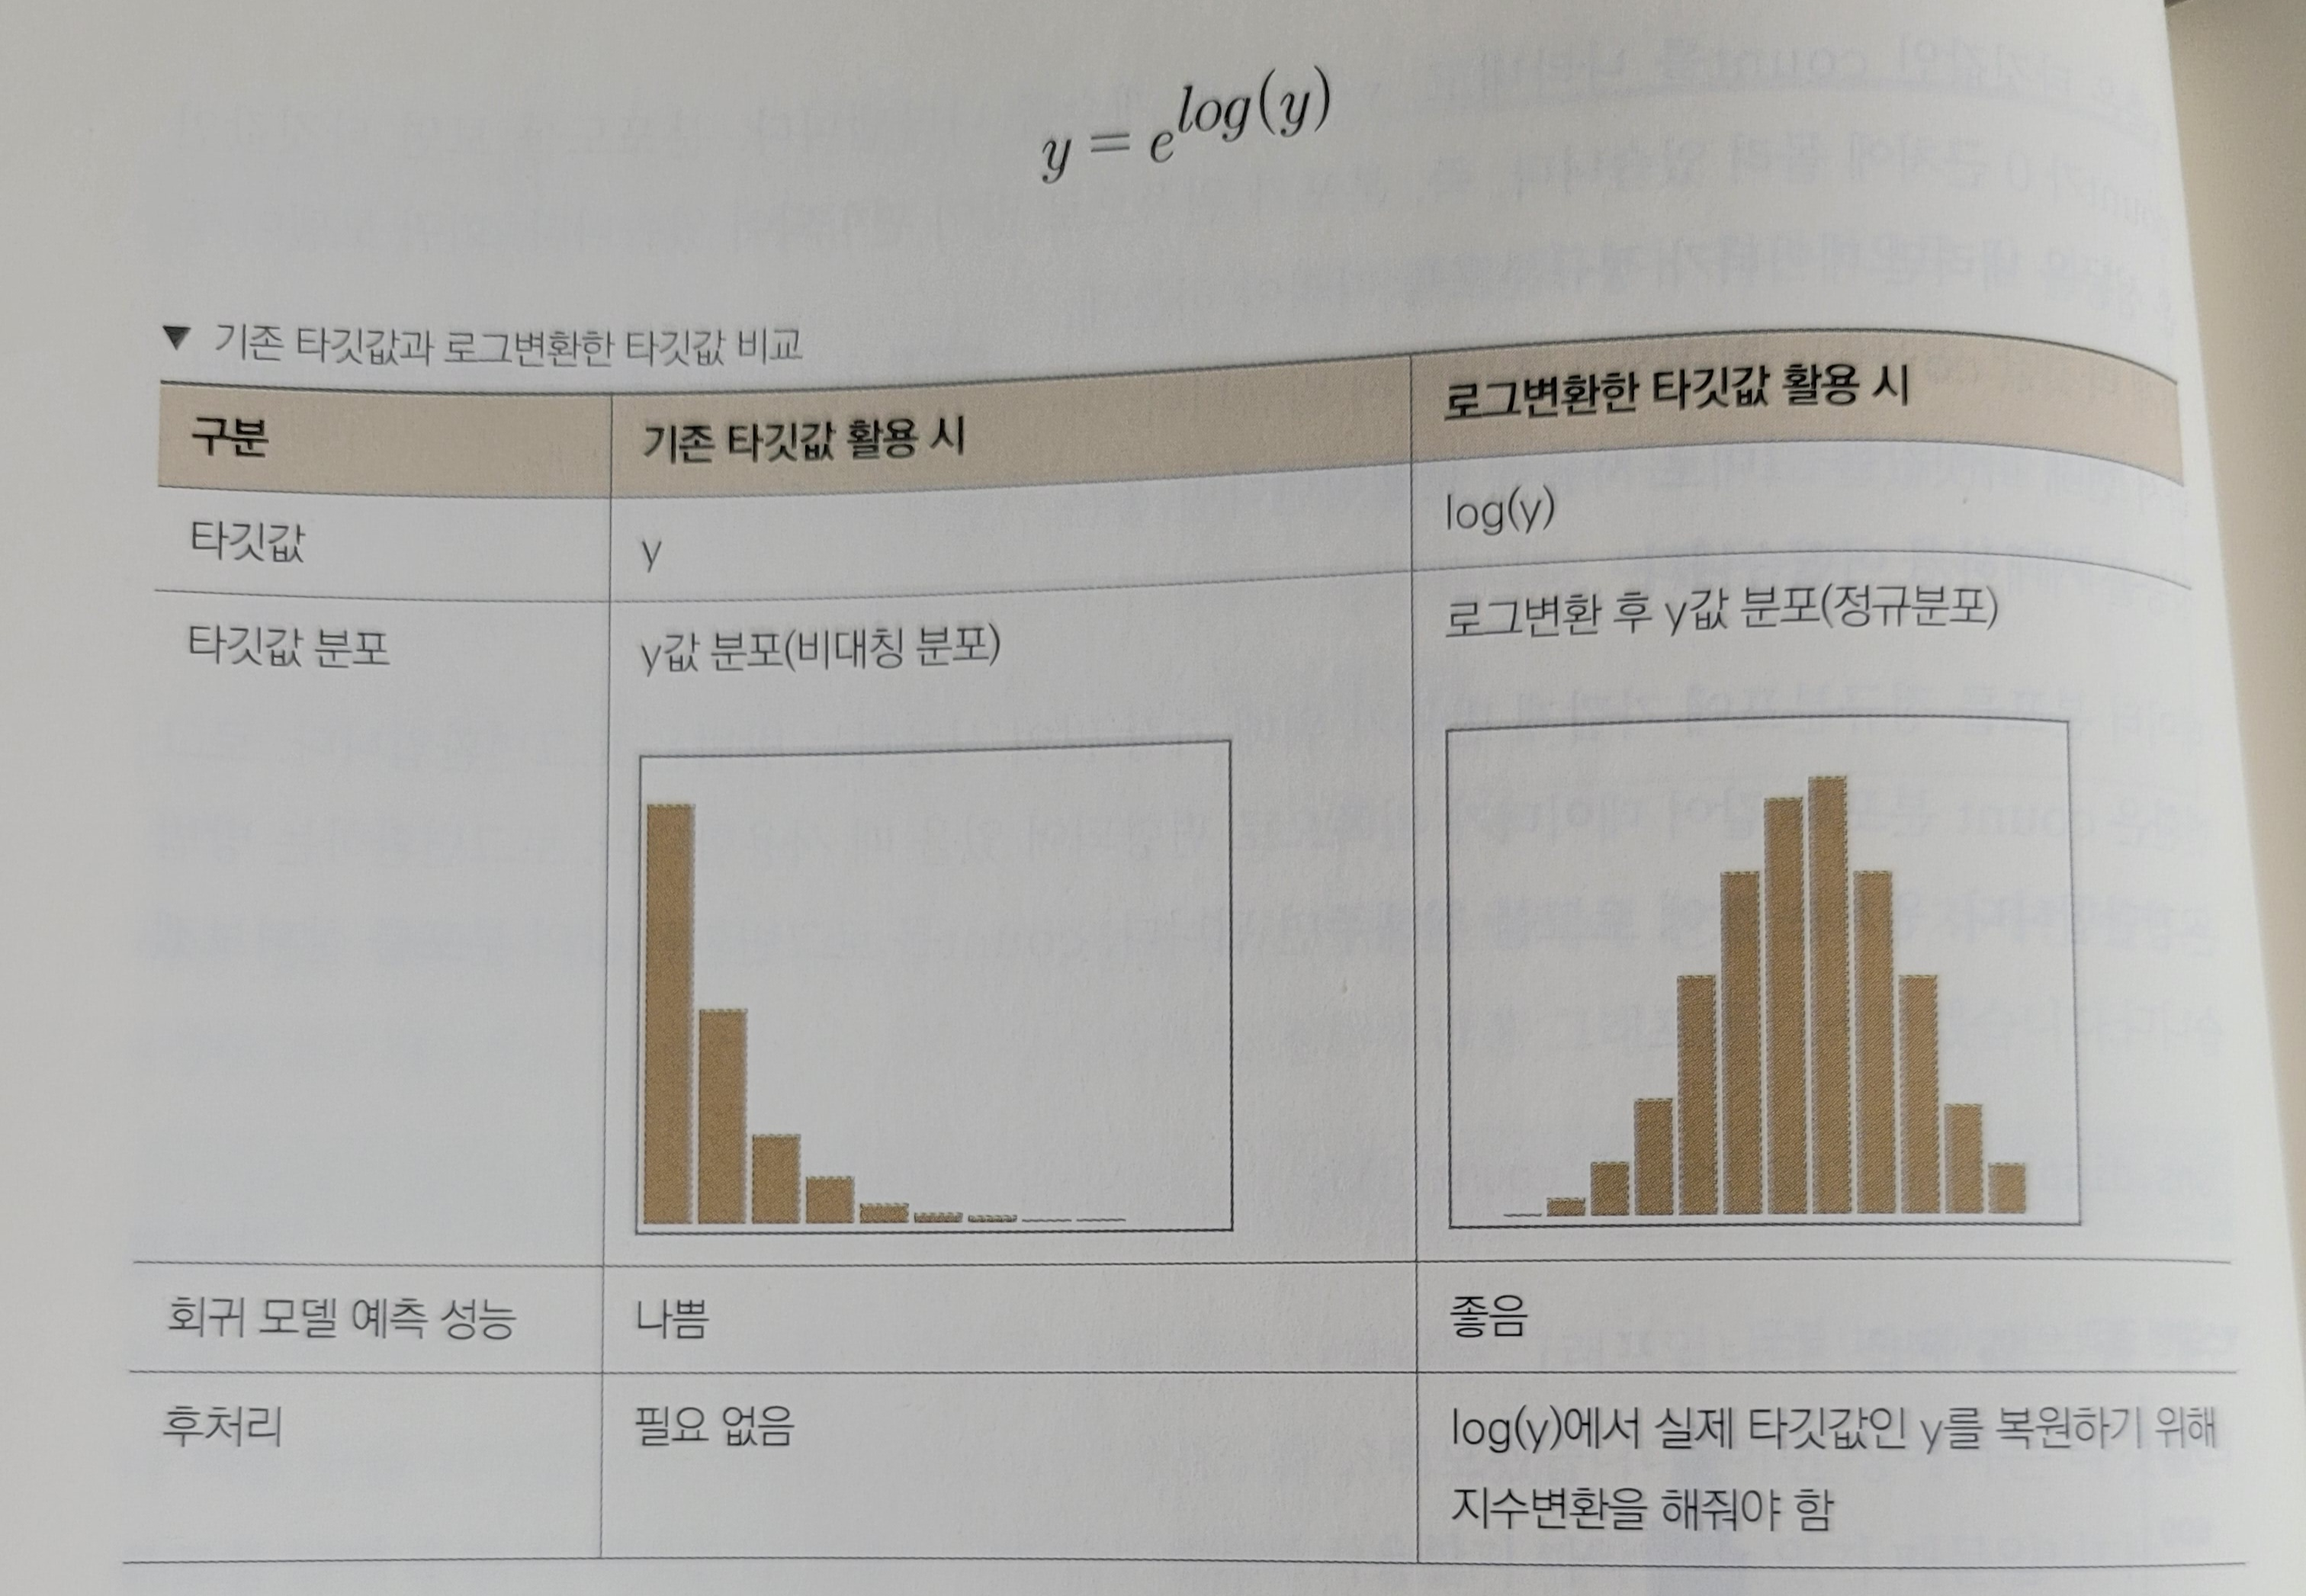

## 막대 그래프

각 범주형 데이터에 따라 평균 대여 수량의 어떻게 다른지 파악해야 어떤 변수가 중요한지 알 수 있음

연도,월,일,시간,분,초별로 평균 대여 수량

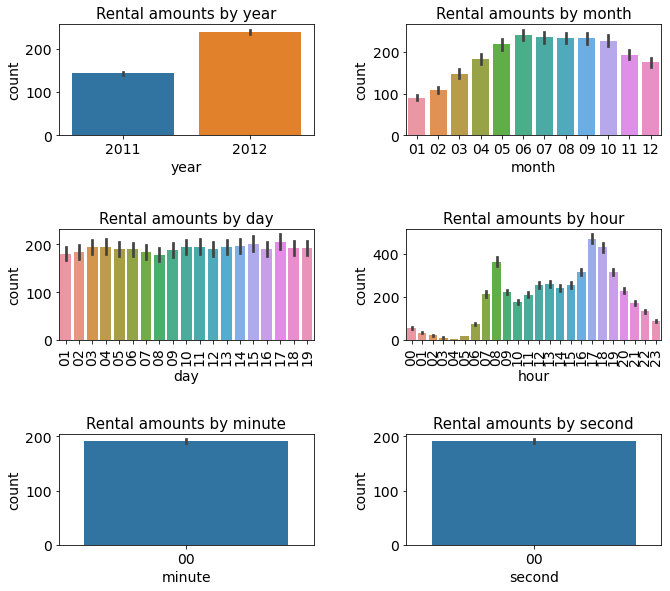

In [18]:
mpl.rc('font',size=14)
mpl.rc('axes',titlesize=15)
figure,axes=plt.subplots(nrows=3,ncols=2)
plt.tight_layout()#여백
figure.set_size_inches(10,9)
sns.barplot(x='year',y='count',data=train,ax=axes[0,0])
sns.barplot(x='month',y='count',data=train,ax=axes[0,1])
sns.barplot(x='day',y='count',data=train,ax=axes[1,0])
sns.barplot(x='hour',y='count',data=train,ax=axes[1,1])
sns.barplot(x='minute',y='count',data=train,ax=axes[2,0])
sns.barplot(x='second',y='count',data=train,ax=axes[2,1])
#서브프롯 제목달기
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')
#x축 라벨을 90도 회전
axes[1,0].tick_params(axis='x',labelrotation=90)
axes[1,1].tick_params(axis='x',labelrotation=90)

- 연도: 2011 < 2012

- 월: max:6월, min=1월 $\rightarrow$ 날씨가 따뜻할수록 대여 수량이 많다고 짐작

- 일: 일별 대여 수량은 뚜렷한 차이가 없음

- 시간: 쌍봉형 그래프  
새벽 4시에 자전거 타는 사람은 거의 없을거니까 제일 적은게 당연하고,아침 8시와 오후 5-6시에 많은 이유는 출퇴근 길에 자전거를 이용한다고 짐작 

- 분,초: 아무 정보가 없음

## 박스플롯  
범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프,막대보다 정보가 많음

계절,날씨,공휴일,근무일별 대여 수량

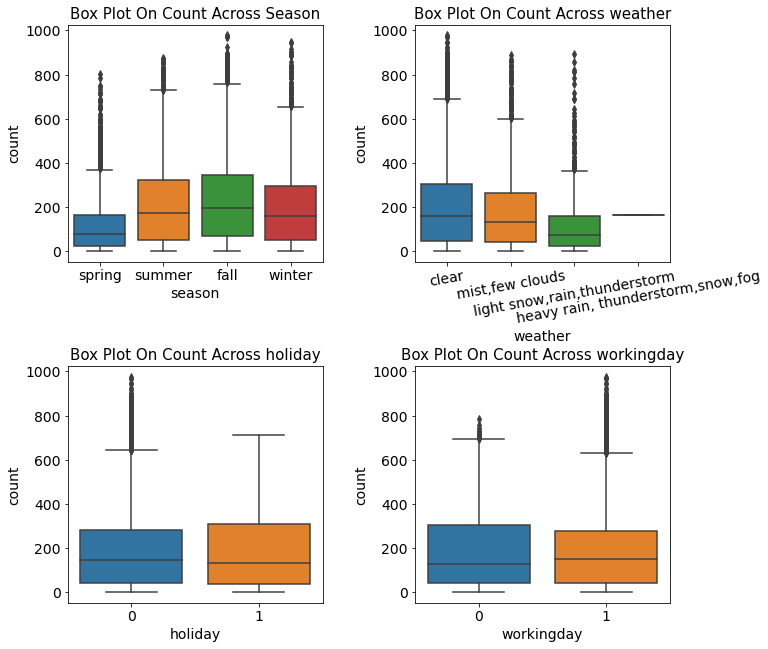

In [19]:
figure,axes=plt.subplots(nrows=2,ncols=2)
plt.tight_layout()#여백
figure.set_size_inches(10,10)
sns.boxplot(x='season',y='count',data=train,ax=axes[0,0])
sns.boxplot(x='weather',y='count',data=train,ax=axes[0,1])
sns.boxplot(x='holiday',y='count',data=train,ax=axes[1,0])
sns.boxplot(x='workingday',y='count',data=train,ax=axes[1,1])
#서브프롯 제목달기
axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across weather')
axes[1,0].set(title='Box Plot On Count Across holiday')
axes[1,1].set(title='Box Plot On Count Across workingday')
#x축 라벨 겹침 해결
axes[0,1].tick_params(axis='x',labelrotation=10)

- 계절: 봄이 가장 적고 가을이 많다

- 날씨: 직관과 일치, 날씨가 좋으면 많고 안 좋을수록 적다

- 공휴일: 거의 비슷,그런데 공휴일 아닐 때는 이상치가 많음

- 근무일: 공휴일이랑 비슷, 근무일일 때는 이상치가 많음

## 포인트 플롯

근무일,공휴일,요일,계절,날씨에 따른 시간대별 평균 대여 수량

<AxesSubplot:xlabel='hour', ylabel='count'>

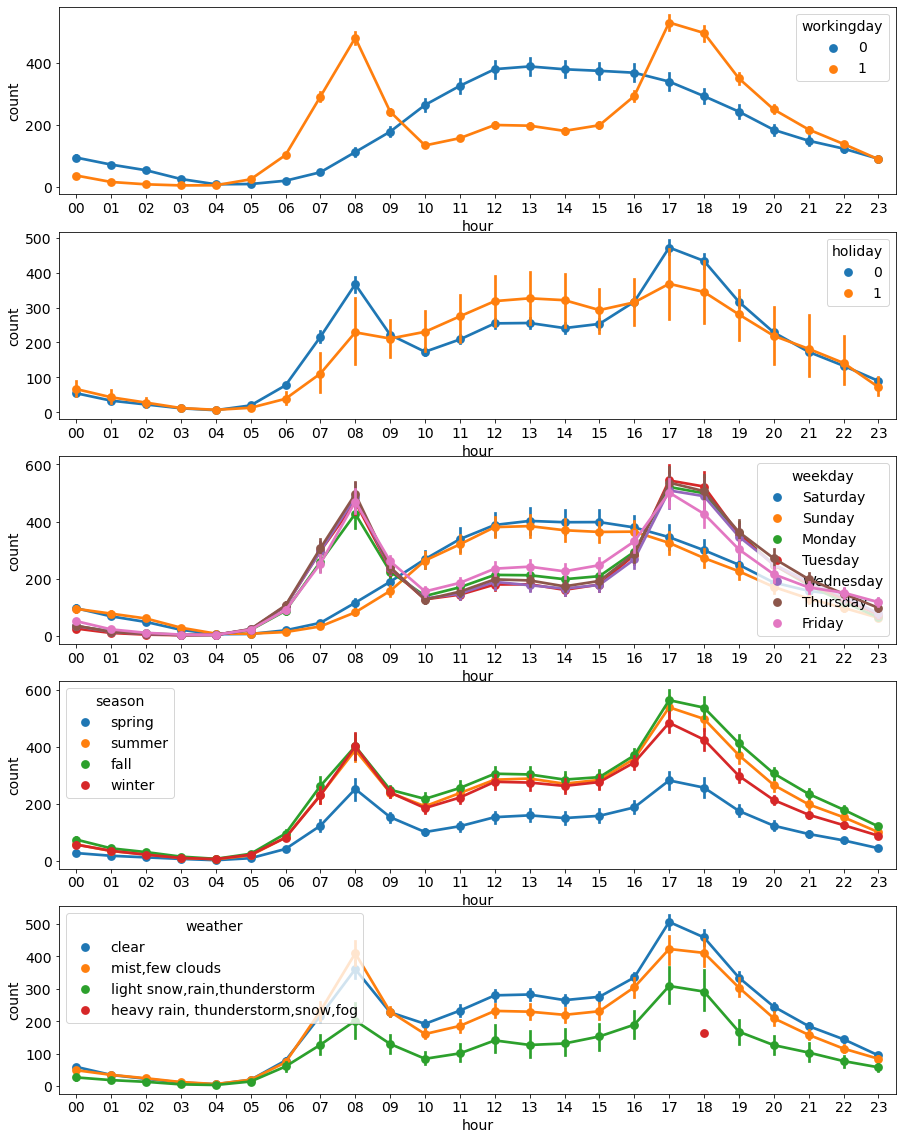

In [22]:
figure,axes=plt.subplots(nrows=5)
figure.set_size_inches(15,20)
sns.pointplot(x='hour',y='count',data=train,hue='workingday',ax=axes[0])
sns.pointplot(x='hour',y='count',data=train,hue='holiday',ax=axes[1])
sns.pointplot(x='hour',y='count',data=train,hue='weekday',ax=axes[2])
sns.pointplot(x='hour',y='count',data=train,hue='season',ax=axes[3])
sns.pointplot(x='hour',y='count',data=train,hue='weather',ax=axes[4])

- 근무일에는 출퇴근 시간에 많고, 쉬는 날에는 오후 12~2시에 가장 많음

- 가을에 가장 많고 봄에 가장 적음

- 날씨가 좋을 때 많음

- 폭우,폭설 내릴 때 저녁 6시에 건수가 있으나 제거하겠음

### 회귀선을 포함한 산점도 그래프

수치형 데이터 온도,체감온도,풍속,습도별 대여 수량

<AxesSubplot:xlabel='humidity', ylabel='count'>

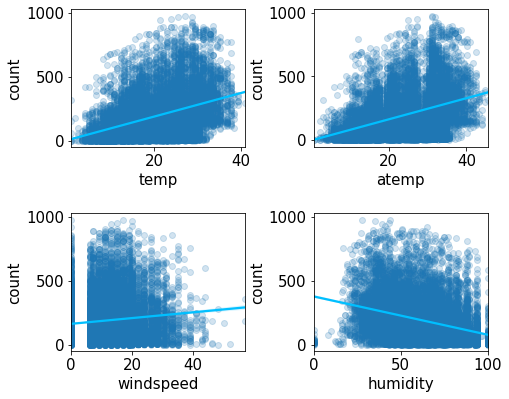

In [27]:
mpl.rc('font',size=15)
figure,axes=plt.subplots(nrows=2,ncols=2)
plt.tight_layout()#여백
figure.set_size_inches(7,6)
sns.regplot(x='temp',y='count',data=train,ax=axes[0,0],scatter_kws={'alpha':0.2},line_kws={'color':'deepskyblue'})
sns.regplot(x='atemp',y='count',data=train,ax=axes[0,1],scatter_kws={'alpha':0.2},line_kws={'color':'deepskyblue'})
sns.regplot(x='windspeed',y='count',data=train,ax=axes[1,0],scatter_kws={'alpha':0.2},line_kws={'color':'deepskyblue'})
sns.regplot(x='humidity',y='count',data=train,ax=axes[1,1],scatter_kws={'alpha':0.2},line_kws={'color':'deepskyblue'})

scatter_kws:투명도 조절, 1에 가까우면 완전 불투명  
line_kws: 회귀선

- 온도와 체감온도가 높을수록 수량이 많고, 습도가 낮을수록 대여를 많이 함

- 풍속이 셀수록 대여가 많은게 이상  
결측치가 많음,0인 데이터 $\rightarrow$ 삭제

## 히트맵  
수치형 데이터끼리 관계 알아보기

In [30]:
train[['temp','atemp','humidity','windspeed','count']].corr()

temp     atemp  humidity  windspeed     count
temp       1.000000  0.984948 -0.064949  -0.017852  0.394454
atemp      0.984948  1.000000 -0.043536  -0.057473  0.389784
humidity  -0.064949 -0.043536  1.000000  -0.318607 -0.317371
windspeed -0.017852 -0.057473 -0.318607   1.000000  0.101369
count      0.394454  0.389784 -0.317371   0.101369  1.000000

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

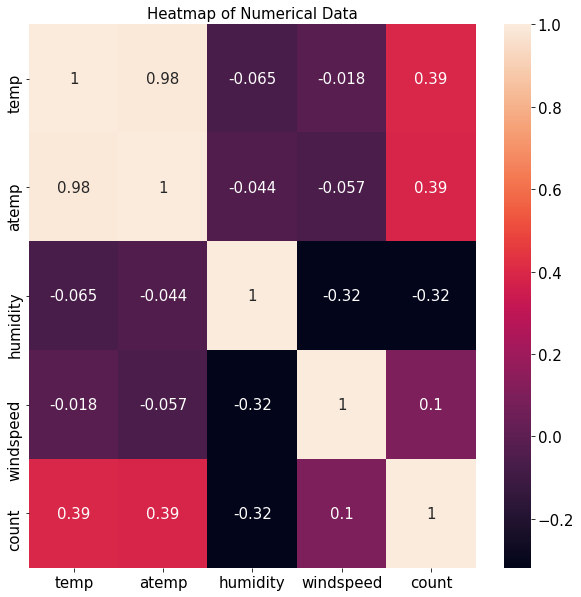

In [31]:
corrMat=train[['temp','atemp','humidity','windspeed','count']].corr()
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat,annot=True)
ax.set(title='Heatmap of Numerical Data')

- 온도와 수량은 0.39로 양의 상관관계이므로 높을수록 대여량이 많다는 뜻  
- 습도는 음수라서 낮을수록 대여량이 많다는 뜻  
- 풍속은 별 도움을 안 줌  